# <span style="color:orange">26/05 - Pair Test Estadísticos 2- Alicia y Lidia</span>

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from scipy.stats import skew 
from scipy.stats import kurtosistest 
from scipy import stats
from scipy.stats import kstest 
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

**En este ejercicio de pair programming seguiremos usando el dataset de listings.csv**

In [2]:
df = pd.read_csv("./listing_nuevo.csv", index_col=0)
df.head(2)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Chamartín,Private room,59,1,81,1,149,3
1,Latina,Private room,31,4,33,2,131,0


### 1. **Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?**

>COVARIANZA : No tiene rango definido, puede ser - ∞ a ∞, solo indica la dirección de la relación lineal entre dos variables. 

>CORRELACION: Tiene rango entre -1 y +1,indica tanto la fuerza como la dirección de la relación lineal entre dos variables.


### 2. **Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos.Calculad solo la correlación de Pearson.**

**VISUALMENTE** 👀

    Podemos adelantar con la gráfica al ver los valores tan dispersos que no van a tener mucha relación.

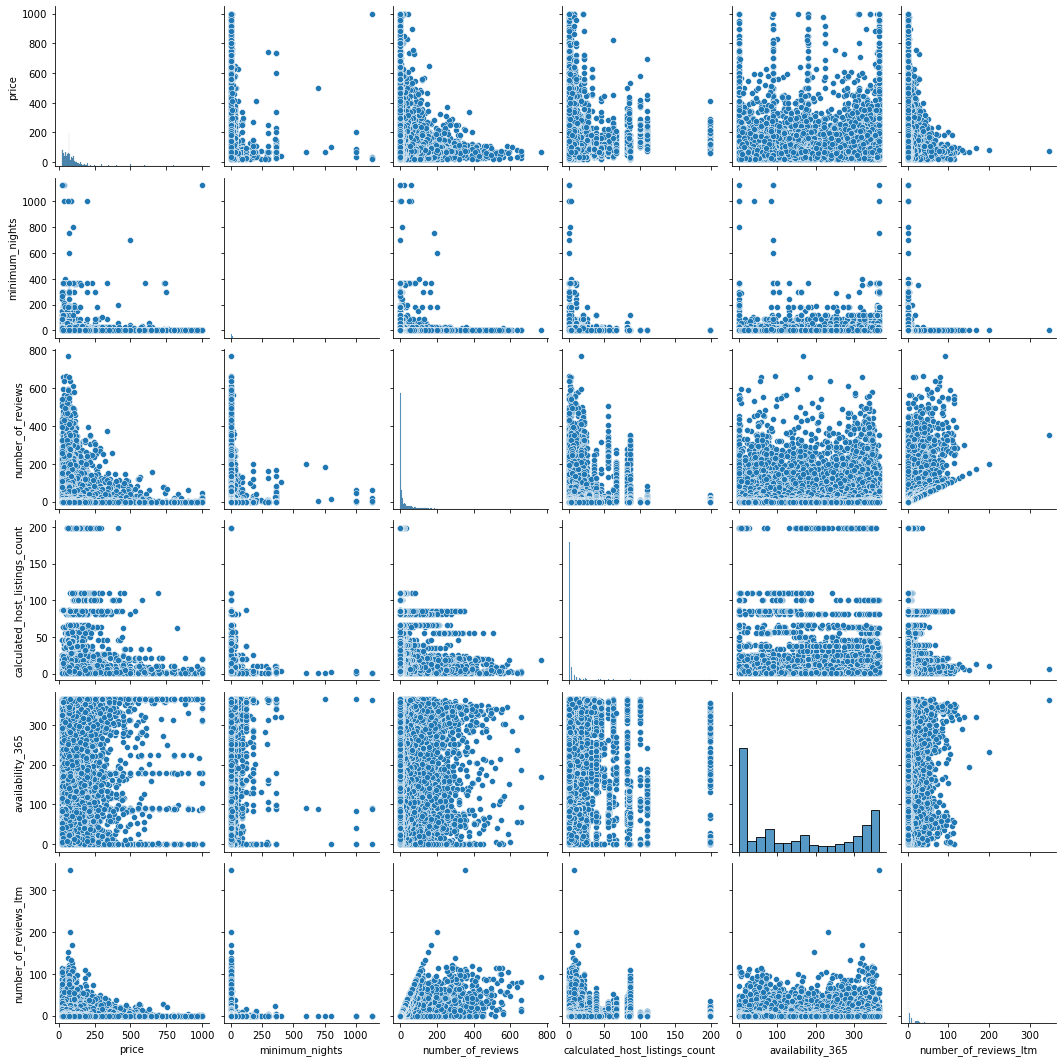

In [3]:
sns.pairplot(df);

**ANALITICAMENTE**  📈

In [4]:
df.cov()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,16478.519362,-56.725960,-901.597994,130.630653,2457.937573,-140.883750
minimum_nights,-56.725960,1323.212281,-98.851004,-19.819585,167.355122,-33.046660
number_of_reviews,-901.597994,-98.851004,4758.206518,-48.482923,487.052217,515.382252
calculated_host_listings_count,130.630653,-19.819585,-48.482923,775.224071,269.044690,21.035612
availability_365,2457.937573,167.355122,487.052217,269.044690,19507.300405,253.847955
number_of_reviews_ltm,-140.883750,-33.046660,515.382252,21.035612,253.847955,178.683118


**"availability_365"  tiene covarianza posita con todas las demás variables , todas aumentarán en la misma dirección.**

**En cambio, todas las demás,no siempre alcanzan una covarianza positiva, tienen covarianza negativa en algunas relaciones , es decir, cuando aumente el valor de una, disminuirá el valor de la otra.**


In [5]:
#Si no se indica que tipo de correlación deseamos usar, por defecto utilizará PEARSON
df.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.012148,-0.101820,0.036549,0.137092,-0.082103
minimum_nights,-0.012148,1.000000,-0.039395,-0.019569,0.032940,-0.067963
number_of_reviews,-0.101820,-0.039395,1.000000,-0.025244,0.050554,0.558941
calculated_host_listings_count,0.036549,-0.019569,-0.025244,1.000000,0.069185,0.056520
availability_365,0.137092,0.032940,0.050554,0.069185,1.000000,0.135967
number_of_reviews_ltm,-0.082103,-0.067963,0.558941,0.056520,0.135967,1.000000


**Correlación Pearson:**
    
**No vemos ningun valor 0 por lo que no hay ninguna variable que no esté relacionada con otra.**

**Cuando vemos los valores 1 suele coindidir en la comparación de las mismas variables por lo que tienen relación completa.**

**Cuanto más cerca a 1 o -1 más relación tienen.**

**En general, casi todas están más cerca de 0, (ejemplo "price" y " minimum_nights"(-0.012148)), no teniendo tanta relación entre ellas.**

**En cambio ,"number_of_reviews" y "number_of_reviews_ltm" (0.558941), tienen mayor relación ya que están más cerca de 0.**



### 3. **Con los resultados de la correlación del ejercicio anterior, cread un heatmap.**

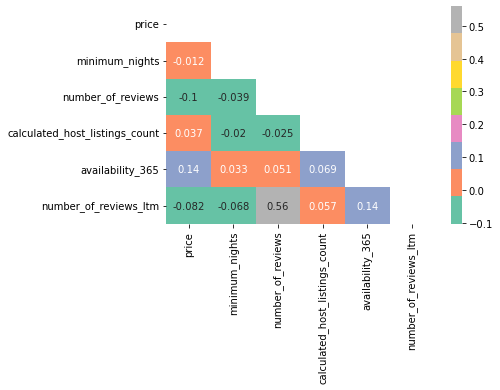

In [6]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
#sns.color_palette("mako", as_cmap=True)
sns.heatmap(df.corr(),
            cmap="Set2",
            mask = mask, 
           annot = True); 

**Aqui podemos confirmar visualmente, los comentarios anteriores, marcado 0.56 "number_of_reviews" y "number_of_reviews_ltm" son las que mayor relaciones tienen entre sí.**

**"price" y " minimum_nights" marcando -0.1, son las variables con menos relación.**

    

### 4. **Guardad la gráfica del heatmap.**

In [8]:
plt.savefig("heatmap.png")

<Figure size 432x288 with 0 Axes>